## Code Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import math, cmath, random

## Functions

In [2]:
def reset_pts(n=4, shift=0):
    
    points = []
    
    for k in range(n):
        arg = k*2*math.pi/n + shift
        points.append(complex(math.cos(arg), math.sin(arg)))
    
    return points

def reorder(pts, new_order):
    return [pts[i] for i in new_order]

def convert_to_coords(pts):
    return [p.real for p in pts], [p.imag for p in pts]

In [3]:
def simulate(start_pts, step_size=0.001, stop_distance=0.005, return_center=False):
    
    n_pts = len(start_pts)
    current_pts = [p for p in start_pts]
    paths = [[start_pts[k]] for k in range(n_pts)]
    center = sum(start_pts) / n_pts
    
    while True:
        for k in range(n_pts):
            if k == 0:
                last_target = current_pts[0]
                # need to store first pt, else last pt will step towards updated pos of first pt

            if k == n_pts - 1:
                target = last_target
            else:
                target = current_pts[k+1]
            
            step = (target - current_pts[k]) * step_size
            current_pts[k] += step
            
            paths[k].append(current_pts[k])
        
        if all(abs(p - center) < stop_distance for p in current_pts) or any(abs(p - center) > 10 for p in current_pts):
            break
    
    path_coords = [convert_to_coords(paths[k]) for k in range(n_pts)]
    
    if return_center:
        center_coords = [center.real, center.imag]
        
        return path_coords, center_coords
    else:
        return path_coords


In [4]:
def derivative(coords, degree=1, step=0.001):
    
    for i in range(degree):
        deriv_coords = []
        
        for x, y in coords:
            x_deriv = [(x[j+1] - x[j]) / step for j in range(len(x)-1)]
            y_deriv = [(y[j+1] - y[j]) / step for j in range(len(x)-1)]

            deriv_coords.append((x_deriv, y_deriv))
        
        coords = [deriv_coords[k] for k in range(len(deriv_coords))]
    
    return deriv_coords


In [5]:
def graph(
    paths=[],
    points=[],
    color='b',
    c_dot=[],
    axis_lim=[-1.25, 1.25],
    tick=6,
    save=''
):
    
    plt.axis('square')
    plt.xlim(*axis_lim)
    plt.ylim(*axis_lim)
    plt.locator_params(axis='both', nbins=tick, integer=False)
    
    for path in paths:
        plt.plot(*path, color+',')
        
    if points:
        plt.plot(*points, 'go')
    
    if c_dot:
        plt.plot(*c_dot, 'ro')
    
    if save:
        plt.savefig('Desktop/Graphs/'+save, format='eps', bbox_inches='tight')


## Simulations

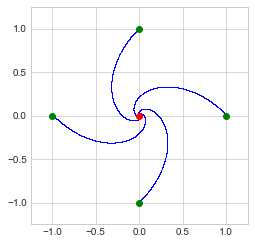

In [6]:
points = reset_pts()
pt_coords = convert_to_coords(points)
pa_coords, c = simulate(points, return_center=True)

graph(pa_coords, pt_coords, c_dot=c, save='spiral.eps')

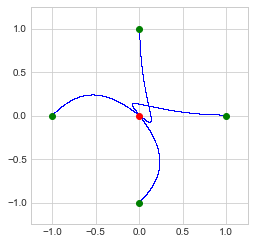

In [7]:
points = reset_pts()
points = reorder(points, [0, 2, 1, 3])
pt_coords = convert_to_coords(points)
pa_coords, c = simulate(points, return_center=True)

graph(pa_coords, pt_coords, c_dot=c, save='switched.eps')

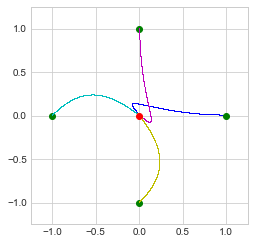

In [8]:
graph([pa_coords[0]], pt_coords)
graph([pa_coords[1]], color='c')
graph([pa_coords[2]], color='m')
graph([pa_coords[3]], color='y', c_dot=c, save='switched_colored.eps')

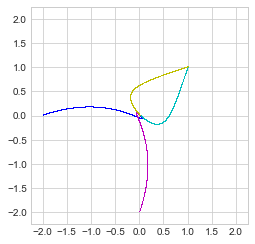

In [9]:
deriv_coords = derivative(pa_coords)

graph([deriv_coords[0]])
graph([deriv_coords[1]], color='c')
graph([deriv_coords[2]], color='m')
graph([deriv_coords[3]], color='y', axis_lim=[-2.25, 2.25], tick=10, save='derivative.eps')


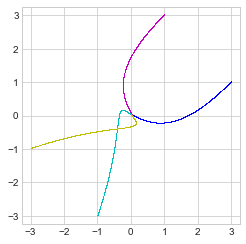

In [10]:
deriv2_coords = derivative(deriv_coords)

graph([deriv2_coords[0]])
graph([deriv2_coords[1]], color='c')
graph([deriv2_coords[2]], color='m')
graph([deriv2_coords[3]], color='y', axis_lim=[-3.25, 3.25], tick=8, save='second_derivative.eps')


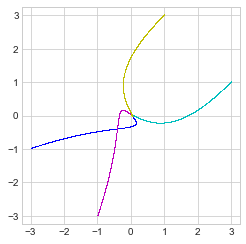

In [11]:
new_pa_coords = [(
    [-3*x_coord-y_coord for x_coord, y_coord in zip(x, y)],
    [-x_coord-3*y_coord for x_coord, y_coord in zip(x, y)]
) for x, y in pa_coords]

graph([new_pa_coords[0]])
graph([new_pa_coords[1]], color='c')
graph([new_pa_coords[2]], color='m')
graph([new_pa_coords[3]], color='y', axis_lim=[-3.25, 3.25], tick=8, save='transformed.eps')


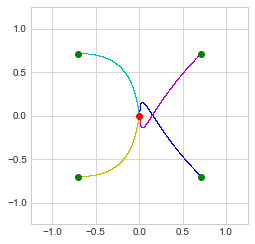

In [12]:
points = reset_pts(shift=-math.pi/4)
points = reorder(points, [0, 2, 1, 3])
pt_coords = convert_to_coords(points)
pa_coords, c = simulate(points, return_center=True)

graph([pa_coords[0]])
graph([pa_coords[1]], color='c')
graph([pa_coords[2]], color='m')
graph([pa_coords[3]], pt_coords, color='y', c_dot=c, save='switched_rotated.eps')

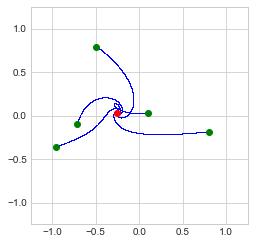

In [13]:
points = [complex(random.uniform(-1, 1), random.uniform(-1, 1)) for k in range(5)]
pa_coords, c = simulate(points, return_center=True)
pt_coords = convert_to_coords(points)

graph(pa_coords, pt_coords, c_dot=c, save='five_random.eps')
# image generated here is likely not the same as the one used in paper, as it is random.
